In [1]:
import numpy as np
import scipy
from qutip import *
from numba import jit, njit
from scipy.signal import find_peaks, peak_widths

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import plot
import plotly.graph_objs as go

In [2]:
Is = 1 #THz^2/mu m^2 --> 10 W/cm^2
eta0 = 0.3  #Franck-Condon factor
gamma_opt_0 = 2*np.pi * 0.04    #in GHz; radiative linewidth
gamma_v_0 = 2*np.pi * 10    #in GHz; vibrational linewidth

p_click = 0.05  #detector efficiency (or click probability)

Om_opt_0 = np.sqrt(8*np.pi/137.*Is)*0.23 #in GHz--0.23 nm = dipole strength DBT (it should be converted in micron, but it cancels out with the conversion from THz to GHz)
n_zpl_0 = .5*gamma_opt_0**2./Om_opt_0**2.   #saturation photon number

ninv_incoh_0 = eta0**2*Om_opt_0**2/(gamma_opt_0*gamma_v_0)  #incoherent pump
I = np.logspace(-3, 9, 100)*Is
#I = np.linspace(0.001, 10e6, 10000000)*Is
rho_ee_coh = I/Is/n_zpl_0/(I/Is/n_zpl_0 + 1.) /2.
rho_ee_incoh = ninv_incoh_0*I/Is/(1.+ninv_incoh_0*I/Is)

print(Om_opt_0, n_zpl_0, gamma_opt_0*ninv_incoh_0/(2*np.pi), .5*gamma_opt_0**2./(Om_opt_0**2*(3./Is)), gamma_opt_0/(2*np.pi)*ninv_incoh_0*(3./Is)*1e6 )

0.09851162482809599 3.2544286846260992 2.2123698804686534e-06 1.0848095615420332 6.637109641405959


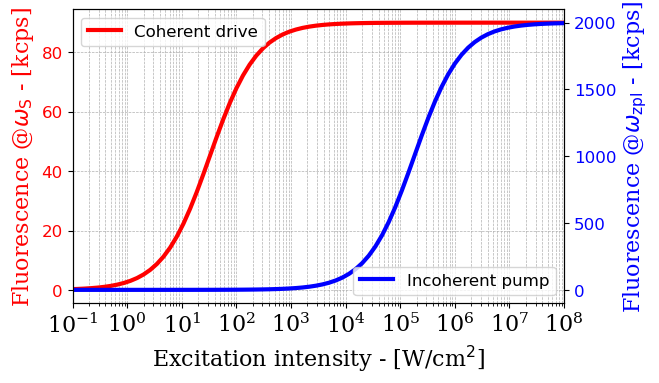

In [3]:
from matplotlib.ticker import LogLocator, ScalarFormatter

# Convert gamma_opt_0 to MHz for the plot
gamma_opt_MHz = gamma_opt_0 / (2 * np.pi)

# Font configuration
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}

# Create the figure and axes
fig, ax1 = plt.subplots()

# Red curve (left y-axis)
ax1.plot(10 * I, eta0**2 * gamma_opt_MHz * rho_ee_coh * p_click * 1e6, linewidth=3, color='red', label='Coherent drive')
ax1.set_xlabel(r'Excitation intensity - [W/cm$^2$]', fontdict=font)
ax1.set_ylabel(r'Fluorescence @$\omega_{\rm S}$ - [kcps]', fontdict=font, color='red')
ax1.tick_params(axis='y', labelcolor='red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)



# Set x-axis to log scale and format labels
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
ax1.xaxis.set_major_formatter(ScalarFormatter())
ax1.xaxis.set_minor_formatter(ScalarFormatter())
ax1.xaxis.get_major_formatter().set_scientific(False)  # Prevent scientific notation
ax1.xaxis.get_major_formatter().set_useMathText(True)  # Use math text for labels

# Add second y-axis (blue curve)
ax2 = ax1.twinx()
ax2.plot(10 * I, gamma_opt_MHz * rho_ee_incoh * p_click * 1e6, linewidth=3, color='blue', label='Incoherent pump')
ax2.set_ylabel(r'Fluorescence @$\omega_{\rm zpl}$ - [kcps]', fontdict=font, color='blue')
ax2.tick_params(axis='y', labelcolor='blue', labelsize=12)


# Manually set x-axis ticks and labels
custom_ticks = [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]  # Tick positions
custom_labels = [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$', r'$10^{5}$']  # Tick labels
ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_labels, fontdict=font)
ax1.set_xscale('log')

ax1.set_xlim(1e-1,1e8)

# Add a grid and title
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
#ax1.set_title('Fluorescence - [kcps]', fontdict=font)

ax1.legend(fontsize=12, loc='upper left')
ax2.legend(fontsize=12, loc='lower right')


# Adjust figure size and layout
plt.gcf().set_size_inches(170 / 25.4, 100 / 25.4)  # Convert mm to inches
plt.tight_layout()
#plt.savefig('v2_saturation_curve_eta.3_gamma0_.04.svg')
# Show the plot
plt.show()